<a href="https://colab.research.google.com/github/Emanuel-/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.18.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8936 - loss: 0.3325 - val_accuracy: 0.9859 - val_loss: 0.0411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9827 - val_loss: 0.0513
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9836 - val_loss: 0.0462
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9920 - val_loss: 0.0269
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9938 - loss: 0.0182 - val_accuracy: 0.9915 - val_loss: 0.0280


In [12]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
classes=[0,1,2,3,4,5,6,7,8,9]

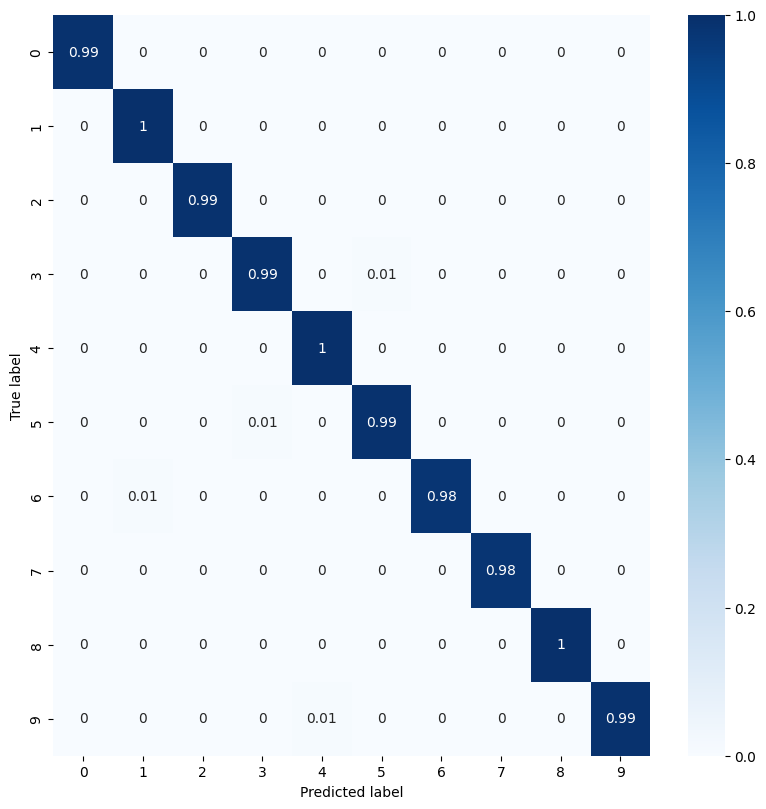

In [16]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()


con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
import numpy as np
import pandas as pd

def calcular_metricas_multiclasse(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    total = confusion_matrix.sum()

    resultados = []

    for classe in range(num_classes):
        VP = confusion_matrix[classe, classe]
        FP = confusion_matrix[:, classe].sum() - VP
        FN = confusion_matrix[classe, :].sum() - VP
        VN = total - (VP + FP + FN)

        # Cálculo das métricas
        acuracia = (VP + VN) / (VP + VN + FP + FN)
        sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
        especificidade = VN / (VN + FP) if (VN + FP) > 0 else 0
        precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
        f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

        resultados.append({
            "Classe": classe,
            "Acurácia": round(acuracia, 4),
            "Sensibilidade": round(sensibilidade, 4),
            "Especificidade": round(especificidade, 4),
            "Precisão": round(precisao, 4),
            "F1-score": round(f1_score, 4)
        })

    return pd.DataFrame(resultados)

df_metricas = calcular_metricas_multiclasse(con_mat)
print(df_metricas)


   Classe  Acurácia  Sensibilidade  Especificidade  Precisão  F1-score
0       0    0.9993         0.9949          0.9998    0.9980    0.9964
1       1    0.9990         0.9982          0.9991    0.9930    0.9956
2       2    0.9983         0.9913          0.9991    0.9922    0.9918
3       3    0.9982         0.9911          0.9990    0.9911    0.9911
4       4    0.9982         0.9959          0.9984    0.9859    0.9909
5       5    0.9979         0.9922          0.9985    0.9844    0.9883
6       6    0.9981         0.9823          0.9998    0.9979    0.9900
7       7    0.9977         0.9835          0.9993    0.9941    0.9888
8       8    0.9986         0.9959          0.9989    0.9898    0.9928
9       9    0.9977         0.9891          0.9987    0.9881    0.9886


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images